In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
import time

### Loading dataset sample

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_LINGUA,Escolaridade_Pai,...,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,DESEMPENHO_BAIXO,Renda_per_capta,Pessoas_por_quarto,Pessoas_por_computador,Celulares_por_pessoa
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,...,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,5.970937e+00,1.393897e+01,4.108614e-01,1.068572e+00,2.139669e+00,3.876546e-01,2.869310e+00,4.491498e-01,5.271628e-01,3.439471e+00,...,2.136560e-01,2.399529e+00,2.399118e-01,6.882020e-01,7.773933e-01,5.000047e-01,8.346541e+02,1.871815e+00,1.819410e+00,4.273131e+01
std,7.183425e+00,7.536545e+00,4.919902e-01,4.164400e-01,1.012008e+00,4.911290e-01,3.971679e+00,6.148688e-01,4.992617e-01,1.873869e+00,...,4.098868e-01,1.070197e+00,4.270295e-01,7.721223e-01,4.159964e-01,5.000001e-01,1.252211e+03,9.952978e-01,1.986800e+00,9.523057e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,8.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.994000e+02,1.333333e+00,0.000000e+00,4.300000e+01
50%,3.000000e+00,1.400000e+01,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.990000e+02,1.666667e+00,1.333333e+00,4.600000e+01
75%,7.000000e+00,2.000000e+01,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.316667e+02,2.000000e+00,3.000000e+00,4.900000e+01
max,7.300000e+01,2.600000e+01,1.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,7.000000e+00,...,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+04,2.000000e+01,2.000000e+01,5.400000e+01


## Feature selection

### Correlation Matrix

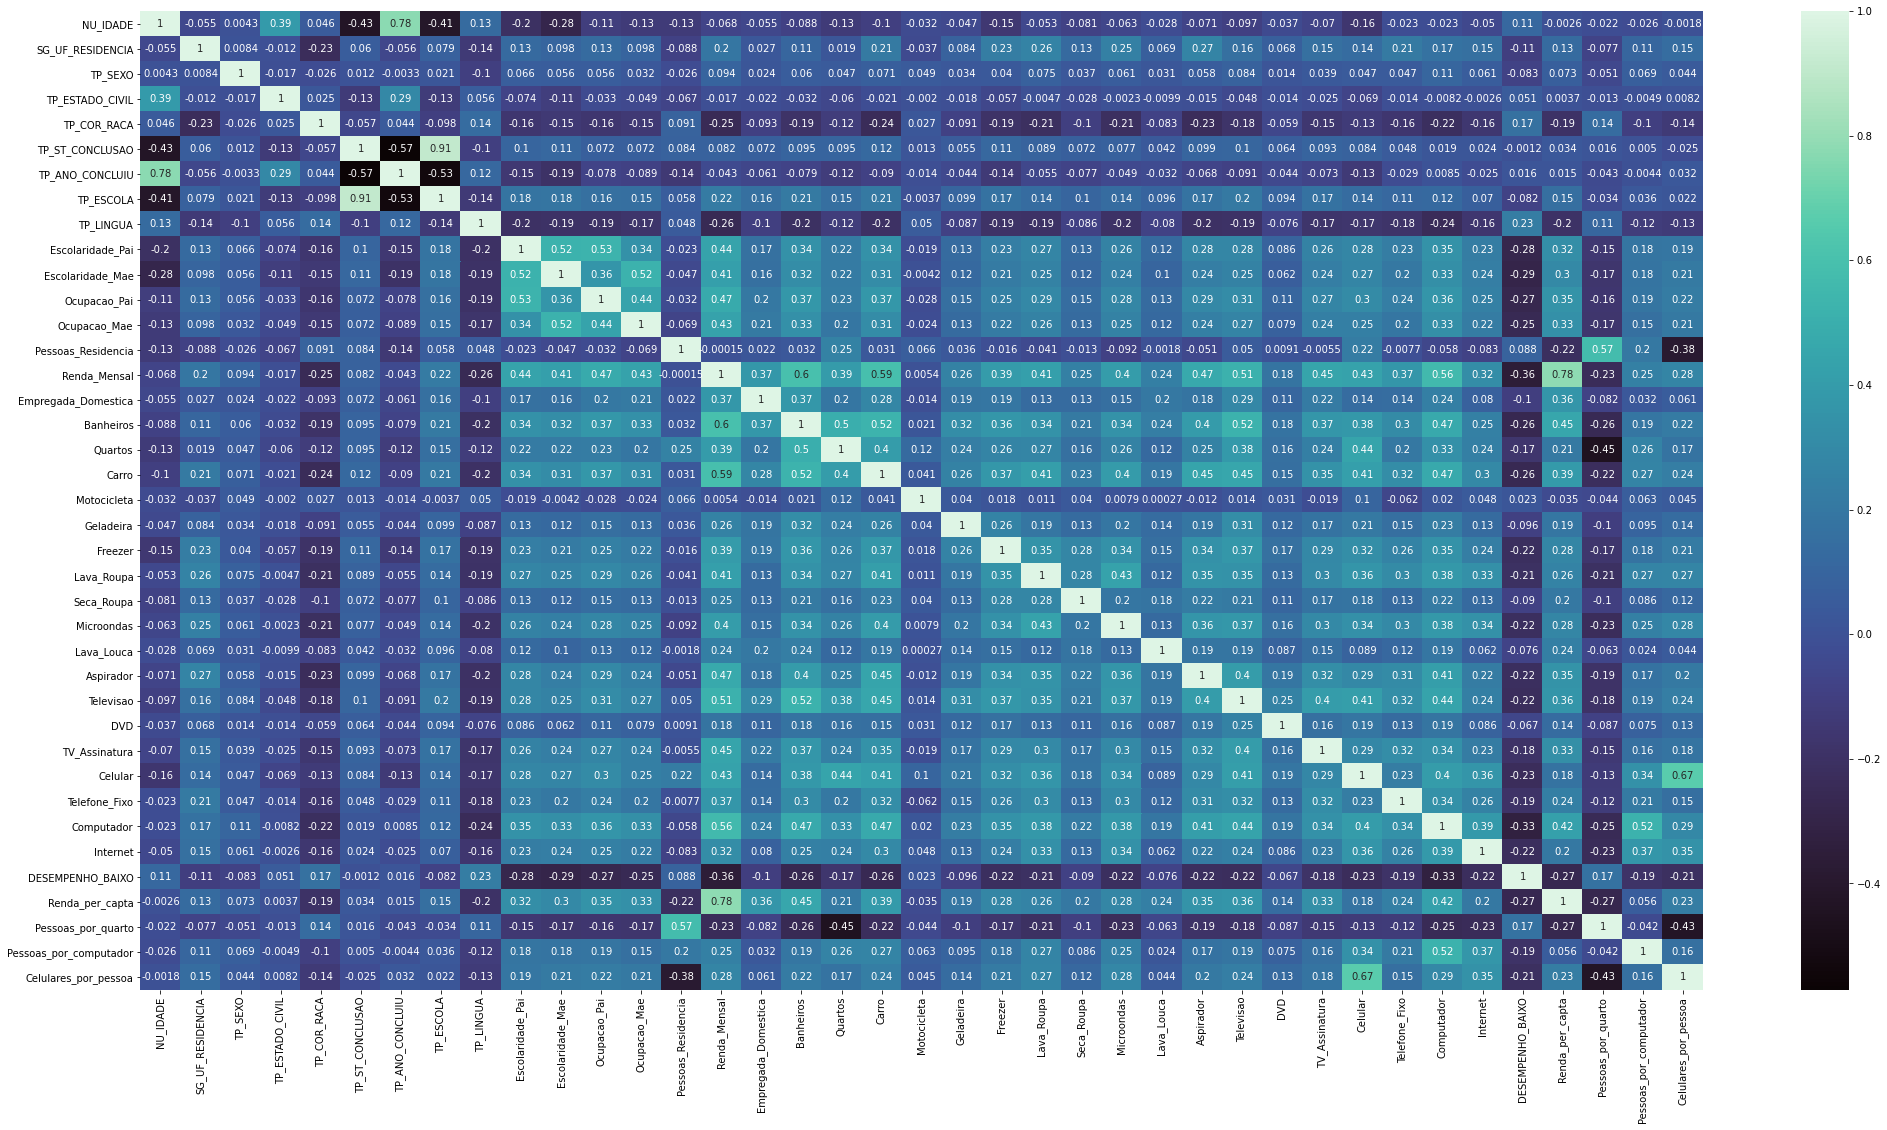

In [3]:
plt.figure(figsize=(35, 18))
sns.heatmap(data.corr(),annot=True,cmap="mako")
plt.savefig("../pictures/Matriz_correlação.png")

### Removing correlated features

In [4]:
data = data.drop("TP_ST_CONCLUSAO", 1)

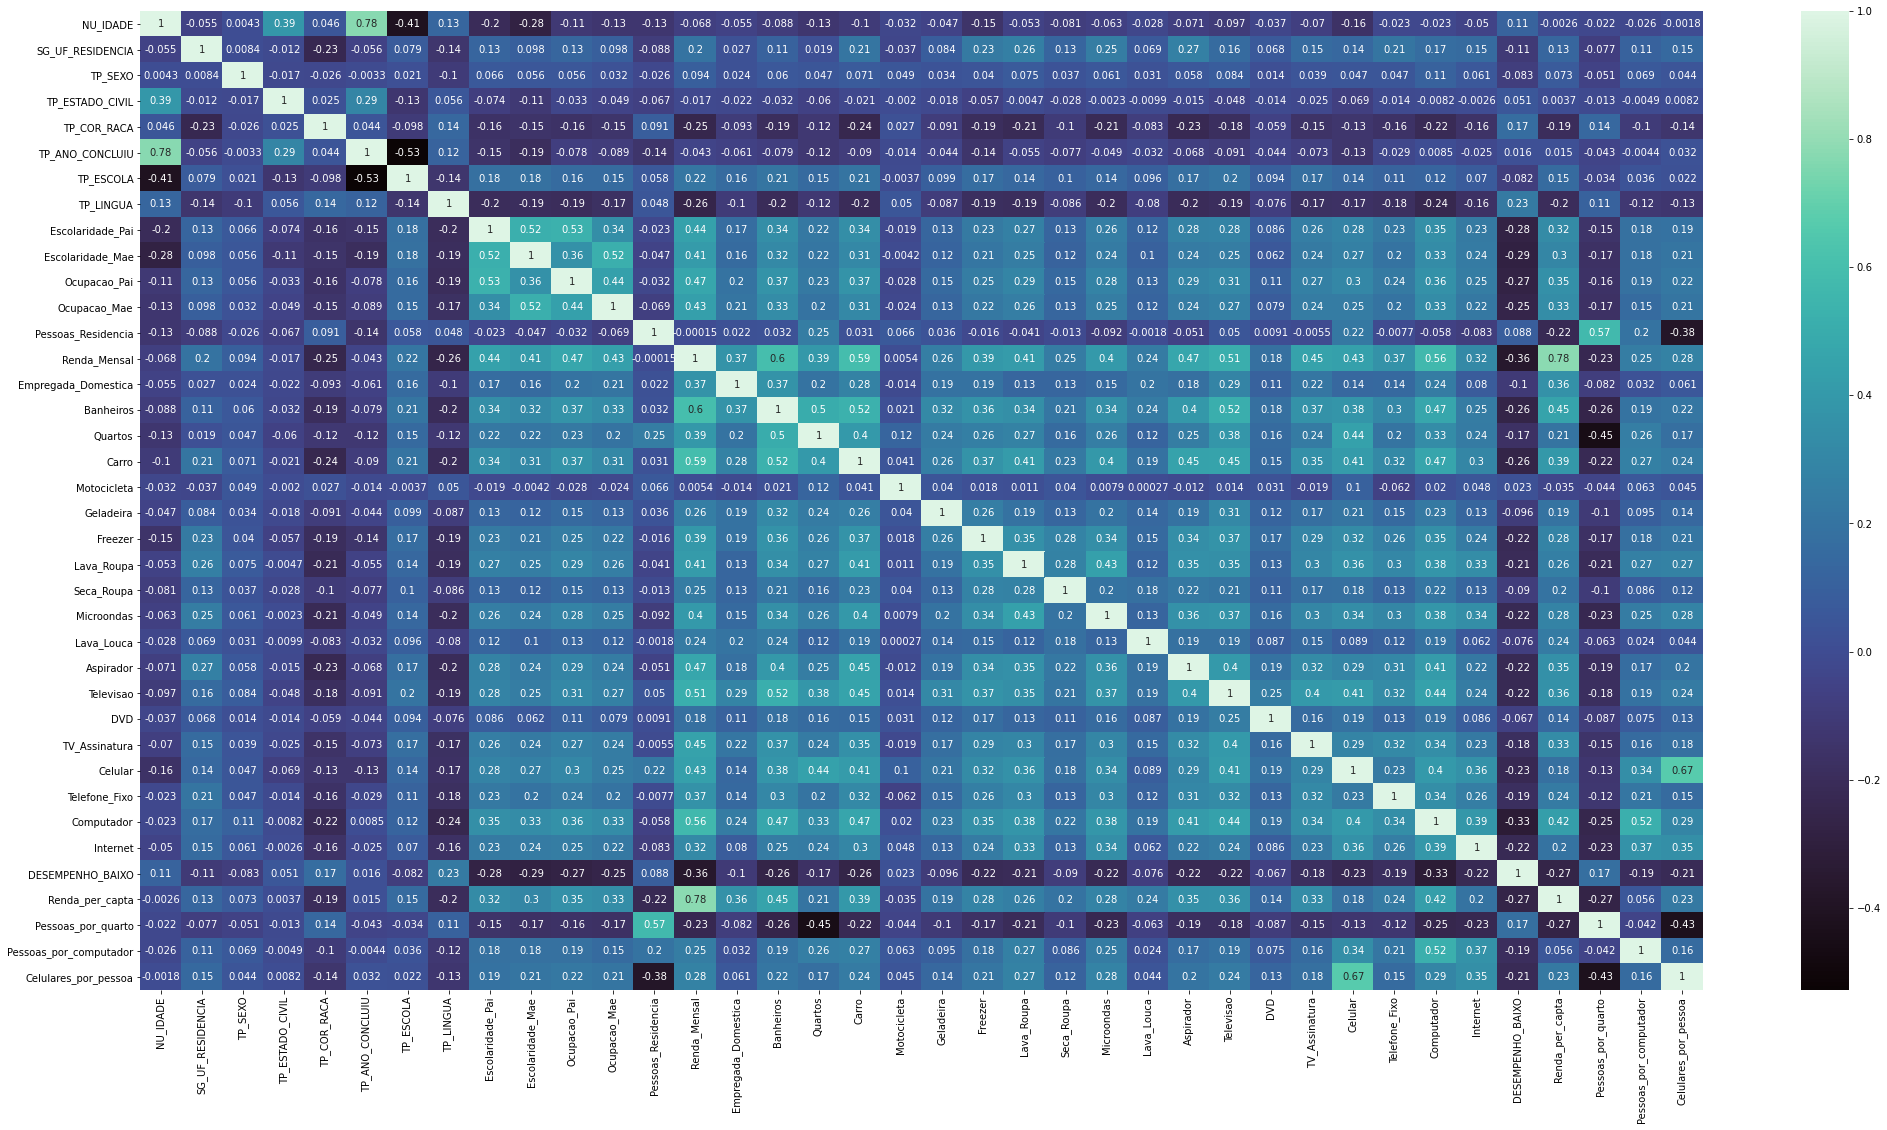

In [5]:
plt.figure(figsize=(35, 18))
sns.heatmap(data.corr(),annot=True,cmap="mako" )
plt.savefig("../pictures/Matriz_correlação_apos_remocao.png")

### Removing sensitive features

In [6]:
data = data.drop(["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL","TP_COR_RACA"], 1)

### Gini index

Running time: 444.1069760322571


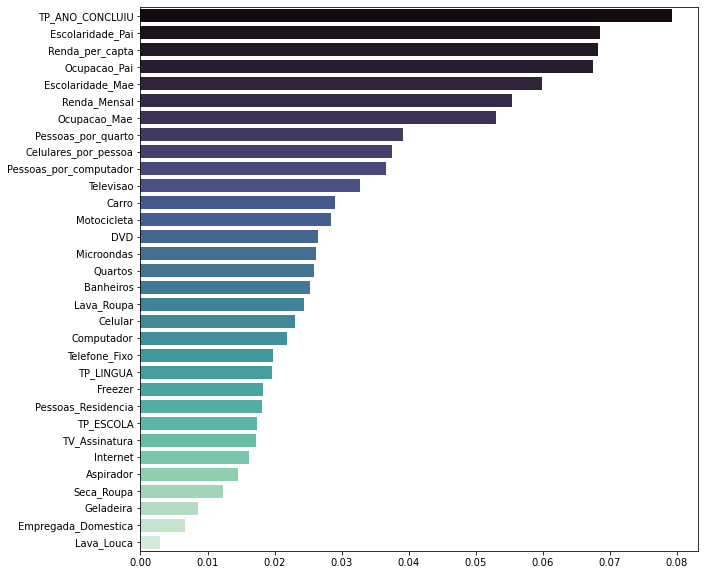

In [7]:
start = time.time()
model = RandomForestClassifier(n_jobs = -1).fit(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = gini_importance, y = gini_importance.index, palette = "mako")
plt.savefig("../pictures/Gini.png")
end = time.time()
print("Running time: " + str(end-start))

In [8]:
data = data.drop(["Empregada_Domestica", "Lava_Louca", "Geladeira", "Seca_Roupa", "Aspirador"], 1)

### Mutual Information method

Running time: 336.0994563102722


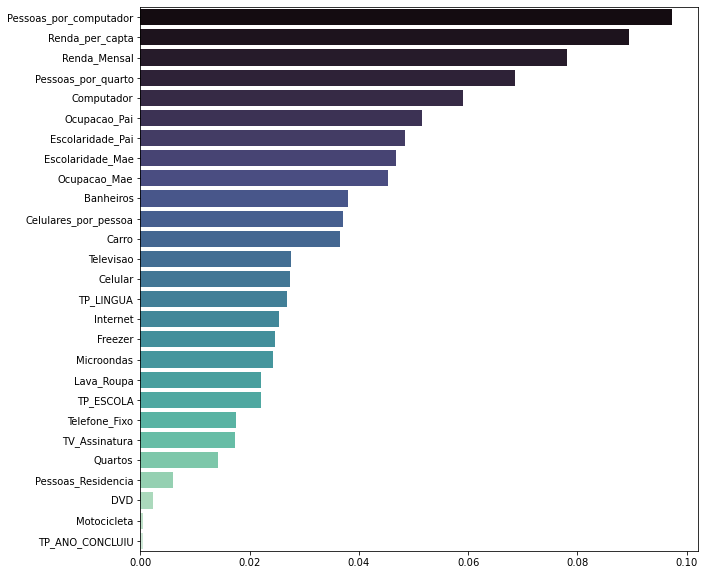

In [9]:
start = time.time()
mi = mutual_info_classif(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"], 
                         discrete_features = [col not in ["Renda_per_capta", 
                        "Pessoas_por_quarto", "Pessoas_por_computador", "Pessoas_por_celular"] for col in data.drop("DESEMPENHO_BAIXO", 1).columns])
mi_importance = pd.Series(mi, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
mi_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = mi_importance, y = mi_importance.index, palette = "mako")
plt.savefig("../pictures/Mutual_Information.png")
end = time.time()
print("Running time: " + str(end-start))

In [10]:
data = data.drop(["Motocicleta", "DVD", "TP_ANO_CONCLUIU", "Pessoas_Residencia"], 1)

### Permutation Importance

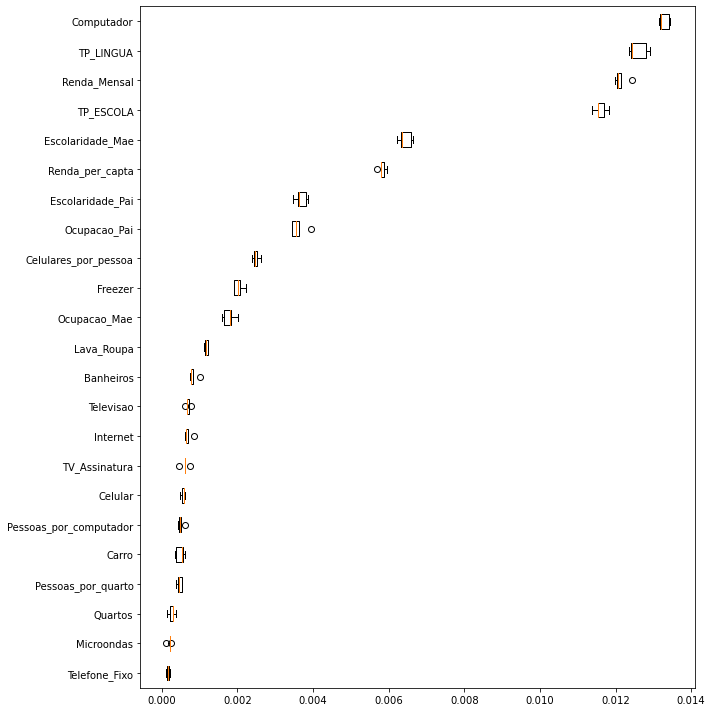

In [11]:
train, test = train_test_split(data, test_size=0.30)
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Permutation_XGBoost.png")

In [12]:
data = data.drop(["Telefone_Fixo", "Microondas", "Televisao", "Quartos", "Internet", "Pessoas_por_quarto",
                 "Celular", "Carro", "TV_Assinatura", "Lava_Roupa"], 1)

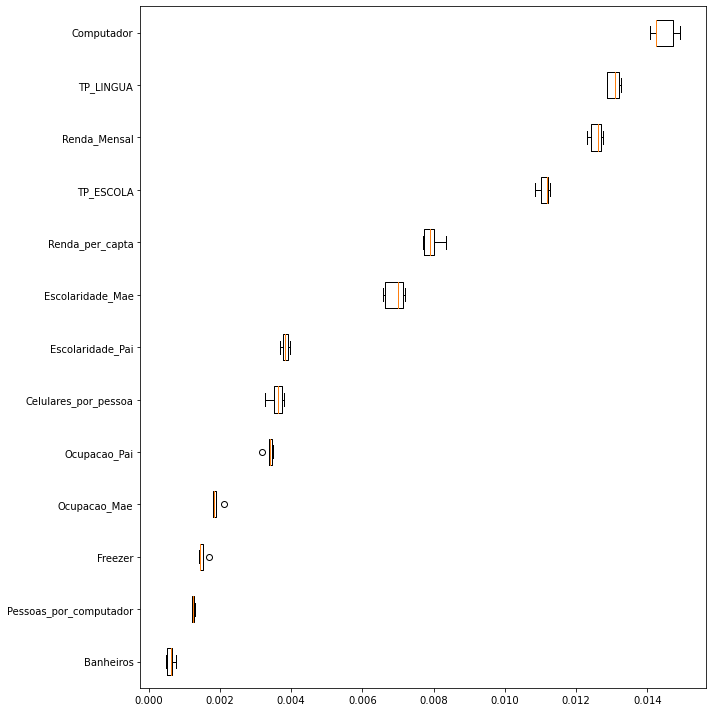

In [13]:
train, test = train_test_split(data, test_size=0.30)
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Permutation_2_XGBoost.png")

### Saving data

In [14]:
data.to_csv("../dataset/dataset_3.csv", sep = ";")